## Before we begin

This material assumes that you have an introductory level of neural networks. If you feel you need to reinforce your knowledge on these subjects, take a look into our [Deep learning foundation course materials](https://github.com/sebratec-academy/deep-learning-foundation), and consider enrolling into Sebratec academy! :D

## Convolutional neural networks



Neural networks can be applied to a lot of different challenges, and image recognition is one of them. In this first part of the material, you will be introduced to a particular neural network architecture called convolutional neural network, or CNN, in short. This architecture is really good in exploring properties of image data.

## Properties of an image

Before we can explore how CNNs can take advantage of these properties of images, we need to talk about what an image is, and about its properties. Images are composed of pixels, made from one or more measurements of light, and these pixels are the smallest elements present in a screen.


Consider a black and white image. It can be represented into a 2D array of numerical values. Each index of this array, in a black and white image, holds a value between 0 to 255, where 0 is black, 255 is white, and the numbers in between are shades of gray.

![bw-pixels](https://user-images.githubusercontent.com/20716798/78840184-64507200-79fa-11ea-8117-6660e489a3e0.png)


For RGB images, it is a little different. There, the pixels are arranged in a 3D array. The first two dimensions represent the position of the pixels that form the image, and the colors are stored inside the third dimension. The third dimension has 3 layers, each corresponding to an RGB color. So, each pixel has three values, one for the amount of red, one for the amount of green, and one for the amount of blue.

![rgb-pixels](https://user-images.githubusercontent.com/20716798/78840721-d70e1d00-79fb-11ea-9b30-180b2be0f629.png)


These layers are overlayed, and the final pixel is composed of the mix of these three color values. So, if you take for example a pixel with (255, 125, 80) RGB values and the final mix would look like this:

![mixed colors](https://user-images.githubusercontent.com/20716798/77757571-ba540b80-7031-11ea-9017-56fa4059327d.png)

## Feeding an image to a neural network

So, in the end, an image is a large 3D array of numbers. If your image has a dimension of 512 * 512, for example, you would have 786.432 numbers inside it.

*to find this number, just multiply the dimensions. In this case, 512 * 512 * 3*

Each of these numbers is an individual feature of the image. Remember that the number of parameters of a neuron in a neural network is the number features and bias, so our neural net, in this case, would have 786.432 + 1 parameters, and that is a lot of parameters for a neural network, that not only is inefficient but also can lead to overfitting very quickly.

Let's say you are trying to recognize something in an image. For example, a car. The car can be located at any point between these 786.432 parameters, and every car image can be very different from one another. The car can be in different positions, in different scenarios, with or without noise in the image, from different angles, with different lighting, and if you analyze these images represented as data, they will be very different from each other, but a car will still be there.

## How CNNs help to address these concerns

To address these concerns, we will use a convolutional neural network, in short, CNN, which is a special kind of neural network that can find useful patterns in an image. As mentioned above, many neural networks are fed with individual inputs, and since each color value inside each pixel is a different input, it would take too much time to learn from these inputs, and they can also lead to overfitting.  

CNNs are useful in this case because instead of using every single input from our image, it uses a technique called parameter sharing, which applies a filter, also called a convolutional kernel, to groups of pixels in different areas of an image, instead of analyzing the whole image at the same time. 

Every CNN is composed of multiple layers, and these layers usually are convolutional, pooling and fully connected layers. Each produces an output that is used for the next one to produce your expected result.

## The convolutional layer

The first important layer of a convolutional neural network is called the convolutional layer. This layer is defined by the filter size, stride, depth and padding parameters, and is the layer inside a CNN responsible for applying the filter to the image. These filters are usually small grids of values that slide over an image, pixel by pixel and outputs a filtered image exposing the extracted feature. The resulting image will be about the same size as the original image.

![applying-filter](https://user-images.githubusercontent.com/20716798/79057315-76cbe500-7c60-11ea-8dc7-6a30dc25f2da.gif)


Under the hood, the filter works by applying convolution to the image, pixel by pixel.

The convolution works by:

- Multiplying the values in the filter with their matching pixel value. So, the value in the top left of our filter (0), will be multiplied by the pixel value in that same corner in our image area (7).

- Sum all these multiplied pairs of values to get a new value, in this case, 9. This value will be the new pixel value in the filtered output image, at the same location as the selected center pixel.


![3D_Convolution_Animation](https://user-images.githubusercontent.com/20716798/78149745-a136ca80-7436-11ea-9097-fbb6b99e8cf1.gif)





\begin{equation}
  \begin{bmatrix}
      0  &  -1  &  0  \\
      -1  &  5  &  -1  \\
      0  &  -1  &  0 \\
  \end{bmatrix}
  .  
  \begin{bmatrix}
    7  &  7  &  6  \\
    7  &  7  &  6  \\
    6  &  6  &  4 \\
  \end{bmatrix}
  =
  \sum
  \begin{bmatrix}
    0  &  -7  &  0  \\
    -7  &  35  &  -6  \\
    0  &  -6  &  0 \\
  \end{bmatrix}
  =
  9
\end{equation}

It is also important to note that these values inside the filters are called weights. The weights determine how important the pixel is when forming the output image. In our example, the center weight is five, meaning that the center pixel is the most important one in our filter.


The filter has a size, which corresponds to how many inputs features in the width and height dimensions one neuron takes in. We do not split up the image by its depth (or the channels), only the width and height. So if we specify the filter size, the number of inputs that our filter will take is filter_width * filter_height * input_depth + 1.


![filter](https://user-images.githubusercontent.com/20716798/77867552-083a6080-7238-11ea-8ebb-b5318fb03d52.png)

And to apply this filter to an image that is bigger than itself, we must move it. We specify how many pixels the filter is going to move with the **stride** hyperparameter. When the stride is 4, for example, then the filters jump 4 pixels at a time as we slide them around. Having a larger stride will produce smaller feature maps.


![stride](https://user-images.githubusercontent.com/20716798/77869803-12f8f380-7240-11ea-8b36-965114ff669b.gif)

You can also use multiple filters instead of just one. The amount of these filters is the hyperparameter called **depth**. These filters produce filtered images based on the input image, extracting a feature from this image that we can use to achieve our desired result. Our filters can, for example, extract the edges from our original image, others can detect useful color patterns and so on.


Sometimes, the filter will not entirely fit inside the image, especially when close to the border. To prevent this, we can specify the **padding** hyperparameter, which in most cases, will ignore or add zero to the missing pixels.

![padding](https://user-images.githubusercontent.com/20716798/79000066-3f6c1400-7b4c-11ea-833c-4f5545147595.gif)

## Normalization

Remember that our pixel values range from 0 to 255? Before we feed these pixels into the convolutional layer, it is important to normalize them to a range between 0 and 1. So, in practice, a black pixel would still be 0, a white pixel would be 1, and a gray pixel with a 145 value would be converted into something close to 0.56 

![normalization2](https://user-images.githubusercontent.com/20716798/79002726-5c571600-7b51-11ea-9229-000a7cc01100.png)

## Activation functions

The convolutional layer is often paired up with the relu activation function. The relu function is pretty simple, it returns zero if the input is less than or equal to zero, and the input itself if it's not. It is a very good function for this specific job because there are occasions where our convolutional filter will be applied to some pixels, and the output will be a negative number. Zero is as dark as our pixel can get, there are no pixels darker than pure black. So, if our output is lower than zero, we just convert it back to zero.

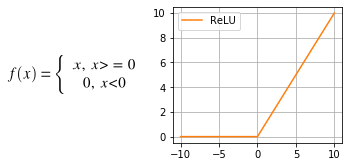

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow

plt.rcParams['figure.figsize'] = [6,2.5]
import numpy as np

# x domain: 41 samples from -10 to 10
x = np.linspace(-10, 10, 41)
x1  = np.linspace(-10, 10, 41)

# ReLU function (Rectified Linear Unit)
# Ranges from 0 to inf
def ReLU(x):
  y = [0 if  i < 0 else i for i in x]
  return y

# Plot the activation function
img = mpimg.imread("https://user-images.githubusercontent.com/20716798/79173890-3eabda00-7df9-11ea-9963-28561dc29e97.png")
f, axarr = plt.subplots(1,2, gridspec_kw={'width_ratios': [0.8, 1]})
axarr[1].plot(x, ReLU(x), 'tab:orange', label='ReLU')
axarr[0].imshow(img)

axarr[1].grid()
axarr[1].legend()
axarr[0].set_axis_off()

## Pooling layer

Following the convolutional layer, comes the pooling layer. The pooling layer is very useful inside our architecture because as our input image moves through our convolutional layers, we are converting an image into a series of stacks of feature maps about the same size as our input image. The convolutional layer does a pretty good job of extracting our desired features, but its outputs are still very large.

This large amount of information has some downsides:

- They are still very prone to overfitting because they record the precise position of the features in the feature map. This means that small variations between the feature in the input image will result in a very different feature map. These variations can happen with different lightning, positioning, shifting, rotation, cropping and that list goes on;

- A large amount of information means a lot of computational power and time to process this information.

So, the purpose of the pooling layer is to reduce the spatial size (width and height) of the layers and it does not touch on the depth. This reduces the number of parameters required in future layers after this pooling layer.

There are a few types of pooling layers, the max-pooling layer being one of the most common.


## Max pooling layer

The max-pooling layer takes a stack of feature maps as an input. Like the convolutional layers, we must also specify size and stride. It is common to choose the window size 2x2 and stride as 2 for these hyperparameters. 

The max-pooling layer reduces the size of the feature maps by taking the maximum values from the inputs inside our window. Then, it does the same for all of the inputs inside our feature maps.

![Max_pooling](https://user-images.githubusercontent.com/20716798/79089296-f54e8280-7d45-11ea-87fd-4176725b8638.png)

As described in the image above, our max-pooling layer:

- Receives a 4x4 feature map;
- Uses a 2x2 window size, and a stride of 2;
- Inside the first window, there are the values [1,0,4,6];
- The highest value among these values is 6, so this is the output of the first pooling operation;
- Moves the window based on the stride value. In this case, 2;
- Repeats until the whole feature map is reduced.


## Fully connected layer

The fully connected layer is usually the last layer inside our convolutional neural network. It is the same as a standard dense neural network layer, meaning that every neuron in the next layer takes as input every neuron in the previous layer’s output. So, taking our example from above, if we have a 4x4x1 input, we would have 16 inputs to it.

The role of our fully connected layer is to predict a class to our input image, and the number of nodes inside our fully connected layer is the number of classes that it can choose from. So, for example, if your network can classify an image as a car or not car, it would have two nodes inside it.